<p><b>Applied Computational Science I</b></p>
<h1 style="margin:0px">Lab: Smoothing Data with B-Splines</h1>
<br/>
<p>Anand Kamble</p>
<a href="mailto:amk23j@fsu.edu">amk23j@fsu.edu</a>
<p>3rd November 2023</p>
<hr style="border:2px solid gray"/>

In [1]:
import numpy as np
import bspline as bs
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

In [2]:
# Importing the data
data = np.loadtxt('xy.dat')

In [3]:
#Seperating the X and Y values.
X = data[:,0]
Y = data[:,1]

<hr style="border:2px solid gray"/>

In [4]:
n = 10     # Number of bins.
p = 2      # Order of spline.

In [5]:
def approx(n,p):
    Xbins = np.linspace(X[0],X[-1],n-p+2)

    # Calculating the knot vector.
    k = np.pad(Xbins,(p,p),mode='constant',constant_values=(X[0],X[-1]))

    # Calling the Bspline class. 
    XSpline = bs.Bspline(k,p)

    A = np.zeros((X.shape[0],n+1))

    for i in range(len(X)):
        A[i,:] = XSpline._Bspline__basis(X[i],p)

    Anew = A.T @ A
    B = A.T @ Y 

    y1 = np.linalg.solve(Anew,B)
    Y_Fit = A @ y1
    #     error = np.sum((np.dot(Anew.copy(),y1.copy()) - B)**2)
    error = np.sum((Y - Y_Fit)**2)
    return A.copy(), Y_Fit.copy(), XSpline, Anew.copy(), B.copy(), y1, error


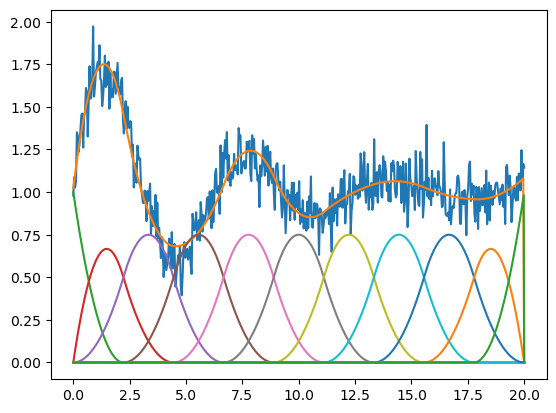

In [6]:
A, Y_Fit, XSpline,Anew, B, y1, error = approx(n,p)
plt.plot(X,Y);
plt.plot(X,Y_Fit);
XSpline.plot();
plt.show();

---

#### Condition Number of Matrix A

In [7]:
condition_number = np.linalg.cond(A)
display(Markdown(f'Condition number of matrix A :<b> {condition_number}</b>'))

Condition number of matrix A :<b> 3.270107564063237</b>

---

#### Cholesky decomposition

In [8]:
def Cholesky(n,p):
    Anew, Y_Fit, XSpline, A, B, y1, e = approx(n,p)
    L = np.linalg.cholesky(A)
    y = np.linalg.solve(L, B)
    x = np.linalg.solve(L.T, y1)
    return x

print("Cholesky decomposition : \n",Cholesky(10,2))

Cholesky decomposition : 
 [0.02553861 0.4733919  0.13462673 0.01748099 0.23910538 0.09075398
 0.12681437 0.15015779 0.14087474 0.08420951 0.38781204]


---

#### QR

In [9]:
def QR(n,p):
    Anew, Y_Fit, XSpline, A, B, y1, e = approx(n,p)
    Q, R = np.linalg.qr(A)
    y = np.dot(Q.T, B)
    x = np.linalg.solve(R, y1)
    return x

print("QR : \n",QR(10,2))

QR : 
 [ 0.03672945 -0.07764826 -0.03867616  0.01611623 -0.03795004 -0.02126611
  0.00637454 -0.063711    0.06431835 -0.18201353  0.15453766]


---

#### Keeping number of bins constant and changing the order.

Using $n = 10$ and $p = [0,5]$

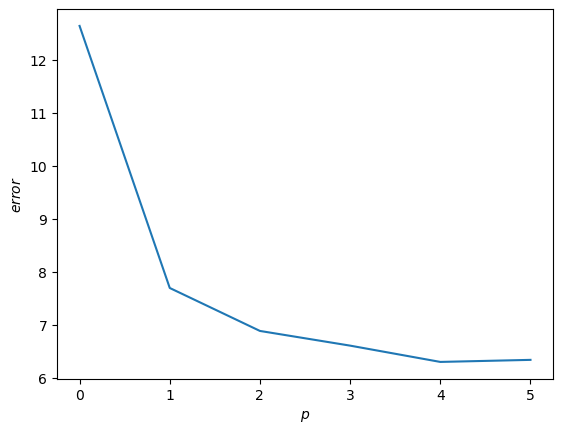

In [10]:
n = 10

errors = list()
for p in range(0,6):
    A, Y_Fit, XSpline,Anew, B, y1, error = approx(n,p)
    errors.append(error)
    
plt.ylabel("$error$")
plt.xlabel("$p$")
plt.plot(range(0,6),errors);

---

#### Keeping the order constant and changing the number of bins.

Using $n = [5,50]$ and $p = 2$ 

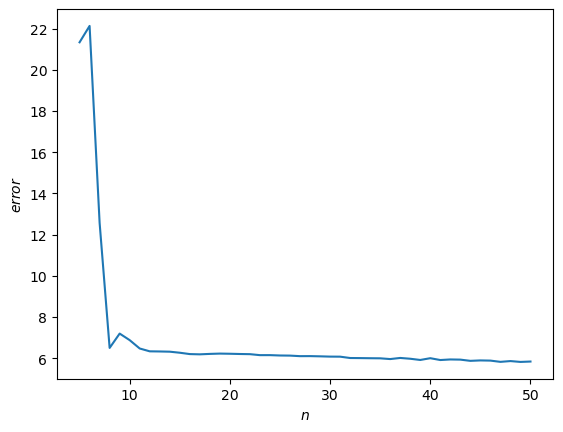

In [11]:
p = 2

errors = list()
for n in range(5,51):
    A, Y_Fit, XSpline,Anew, B, y1, error = approx(n,p)
    errors.append(error)
    
    
plt.ylabel("$error$")
plt.xlabel("$n$")
plt.plot(range(5,51),errors);